In [109]:
import pandas as pd
import functools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

In [110]:
works_custs = pd.read_csv('AdvWorksCusts.csv')
works_custs.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(works_custs.columns)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome'],
      dtype='object')


In [111]:
works_custs.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,4/8/66,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,5/14/65,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,8/12/65,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,2/15/68,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,8/8/68,Bachelors,Professional,F,S,1,4,5,5,92771


In [112]:
bike_buyer = pd.read_csv('AW_BikeBuyer.csv')
bike_buyer.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(bike_buyer.columns)

Index(['CustomerID', 'BikeBuyer'], dtype='object')


In [113]:
bike_buyer.head()

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [114]:
works_custs_bike_buyer = pd.merge(works_custs, bike_buyer, how='left', on='CustomerID')
print(works_custs_bike_buyer.columns)
print(works_custs_bike_buyer)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer'],
      dtype='object')
       CustomerID Title   FirstName MiddleName    LastName Suffix  \
0           11000   NaN         Jon          V        Yang    NaN   
1           11001   NaN      Eugene          L       Huang    NaN   
2           11002   NaN       Ruben        NaN      Torres    NaN   
3           11003   NaN     Christy        NaN         Zhu    NaN   
4           11004   NaN   Elizabeth        NaN     Johnson    NaN   
5           11005   NaN       Julio        NaN        Ruiz    NaN   
6           11006   NaN       Janet          G     Alvarez    NaN   
7           11007   NaN    

In [115]:
#works_custs_bike_buyer.to_csv('works_custs_bike_buyer.csv', encoding='utf-8', index=False)
#works_custs_bike_buyer = pd.read_csv('works_custs_bike_buyer.csv')

In [116]:
print(works_custs_bike_buyer.shape)
works_custs_bike_buyer.head()

(16404, 24)


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,1


In [117]:
labels = np.array(works_custs_bike_buyer['BikeBuyer'])
labels.size

16404

In [118]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education', 'Occupation', 'Gender', 'MaritalStatus']

Features = encode_string(works_custs_bike_buyer['BikeBuyer'])
for col in categorical_columns:
    temp = encode_string(works_custs_bike_buyer[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])    

(16404, 16)
[[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]]


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [119]:
#Features = np.concatenate([Features, np.array(aw_test_bikebuyer[['HomeOwnerFlag', 'NumberCarsOwned', 
#                            'NumberChildrenAtHome', 'YearlyIncome']])], axis = 1)
Features = np.concatenate([Features, np.array(works_custs_bike_buyer[['NumberCarsOwned', 'NumberChildrenAtHome', 'YearlyIncome']])], axis = 1)
print(Features.shape)
print(Features[:2, :])  

(16404, 19)
[[1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.37947e+05]
 [0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 3.00000e+00
  1.01141e+05]]


In [120]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 500) #need to have shuffle=False in here for correct answer
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [121]:
scaler = preprocessing.StandardScaler().fit(X_train[:,18:])
X_train[:,18:] = scaler.transform(X_train[:,18:])
X_test[:,18:] = scaler.transform(X_test[:,18:])
X_train[:2,]

array([[ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  2.        ,  0.        , -0.52751147],
       [ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        , -0.44654991]])

In [122]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [123]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.23046399]
[[-6.88439113e+00  6.65392714e+00  6.29698916e-02 -4.69532565e-02
  -8.56388180e-02 -4.03539492e-02 -1.20487860e-01 -6.11291121e-02
  -2.42894722e-01  1.99187529e-03  2.38332201e-02  4.77347467e-02
  -2.54649143e-01  2.41851504e-02 -4.67532571e-01  2.37068579e-01
  -8.85463578e-02  3.60967123e-01  2.47987219e-01]]


In [104]:
#print('Accuracy of Logistic regression classifier on training set: {:.2f}'
#     .format(logistic_mod.score(X_train, y_train)))
#print('Accuracy of Logistic regression classifier on test set: {:.2f}'
#     .format(logistic_mod.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 1.00


In [105]:
#probabilities = logistic_mod.predict_proba(Features)
#print(probabilities[:15,:])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [106]:
#def score_model(probs, threshold):
#    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
#scores = score_model(probabilities, 0.5)
#print(np.array(scores[:500]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [124]:
df = pd.DataFrame(Features)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,137947.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,101141.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,91945.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,86688.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0,92771.0


In [125]:
#df.to_csv('works_custs_bike_buyer_prediction.csv', encoding='utf-8', index=False)

In [59]:
# Start the test data prediction
aw_test = pd.read_csv('aw_test.csv')
aw_test.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(aw_test.columns)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome'],
      dtype='object')


In [60]:
#aw_test_bike_buyer = pd.merge(aw_test, bike_buyer, how='left', on='CustomerID')
#print(aw_test_bike_buyer.columns)
#print(aw_test_bike_buyer)

In [61]:
labelsT = np.array(aw_test['Occupation'])

In [62]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education', 'Gender', 'MaritalStatus']

FeaturesT = encode_string(aw_test['Occupation'])
for col in categorical_columns:
    tempT = encode_string(aw_test[col])
    FeaturesT = np.concatenate([FeaturesT, tempT], axis = 1)

print(FeaturesT.shape)
print(FeaturesT[:2, :])

(500, 14)
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.]]


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [63]:
FeaturesT = np.concatenate([FeaturesT, np.array(aw_test[['NumberCarsOwned', 'NumberChildrenAtHome', 'YearlyIncome']])], axis = 1)
print(FeaturesT.shape)
print(FeaturesT[:2, :]) 

(500, 17)
[[0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 2.00000e+00 0.00000e+00 8.69310e+04]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 2.00000e+00 2.00000e+00 1.00125e+05]]


In [64]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(FeaturesT.shape[0])
indx = ms.train_test_split(indx, test_size = 300, shuffle=False) #need to have shuffle=False in here for correct answer
X_train = FeaturesT[indx[0],:]
y_train = np.ravel(labelsT[indx[0]])
X_test = FeaturesT[indx[1],:]
y_test = np.ravel(labelsT[indx[1]])

In [65]:
scaler = preprocessing.StandardScaler().fit(X_train[:,16:])
X_train[:,16:] = scaler.transform(X_train[:,16:])
X_test[:,16:] = scaler.transform(X_test[:,16:])
X_train[:2,]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 2.        ,
        0.        , 0.13633053],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 2.        ,
        2.        , 0.47428011]])

In [66]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.80447527 -1.10012921 -0.98787485 -0.70103815 -0.71619547]
[[ 3.57095396e+00 -5.52322967e-01 -1.31429402e+00 -1.12890150e+00
  -1.37991074e+00 -5.69431008e-01 -1.09158955e-01 -5.90467390e-01
   1.55294702e-01  3.09287381e-01 -4.95852075e-01 -3.08623195e-01
  -5.67522004e-01 -2.36953266e-01 -4.71877483e-01 -1.80300439e-01
  -7.00651714e-01]
 [-6.95776155e-01  3.25141313e+00 -2.93232391e-01 -1.87494543e+00
  -1.48758836e+00  1.78542270e-01  2.18447991e-01 -2.91931534e-01
  -7.28563921e-01 -4.76624012e-01 -3.70725793e-01 -7.29403413e-01
  -5.60887896e-01 -5.39241310e-01  2.67201919e-01 -1.33949617e-01
   9.81730248e-01]
 [-1.25286837e+00 -1.88906605e-01  2.44925778e+00 -8.05191417e-01
  -1.19016623e+00 -6.57022405e-01 -4.71567621e-01  1.83211347e-01
  -4.21486446e-01  3.78990276e-01 -6.45648336e-01 -3.42226513e-01
  -5.51541777e-01 -4.36333072e-01 -8.77053391e-01  5.38979239e-02
  -1.54480354e+00]
 [-9.47896556e-01 -1.64834124e+00 -6.53186524e-01  4.16216296e+00
  -1.61377679e+00 -1.32

In [68]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logistic_mod.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logistic_mod.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 1.00


In [228]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[9.07765725e-03 9.63491472e-01 2.15001932e-03 1.13212775e-02
  1.39595740e-02]
 [1.16540674e-03 2.54660114e-02 8.39210648e-05 9.66626075e-01
  6.65858554e-03]
 [1.86468247e-03 9.66725945e-01 1.54837383e-04 1.99494828e-02
  1.13050524e-02]
 [1.84123439e-03 1.84300199e-02 2.94953930e-04 9.72858195e-01
  6.57559647e-03]
 [2.01470844e-02 2.39705786e-03 3.39233900e-02 7.39067137e-03
  9.36141796e-01]
 [9.53774145e-03 1.10731210e-02 2.27925932e-03 9.64128709e-01
  1.29811697e-02]
 [3.89610913e-03 5.77433362e-03 6.56722592e-03 4.25878027e-03
  9.79503551e-01]
 [6.49888142e-03 5.33582018e-03 1.14765057e-02 7.67540243e-03
  9.69013390e-01]
 [9.26386056e-03 5.62558756e-03 3.12389287e-03 1.11281887e-02
  9.70858470e-01]
 [9.40375983e-01 1.64121432e-02 9.87517976e-03 1.66197646e-02
  1.67169299e-02]
 [7.22298575e-03 3.99912642e-03 2.91507106e-03 9.75976061e-01
  9.88675611e-03]
 [9.48381423e-01 6.57058800e-03 2.56945243e-02 6.47991312e-03
  1.28735512e-02]
 [7.90338849e-03 9.61954216e-01 1.306927

In [229]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:500]))

[1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0]


In [230]:
df = pd.DataFrame(scores)
df.head()

,0
0,1
1,0
2,1
3,0
4,0


In [231]:
df.to_csv('prediction.csv', encoding='utf-8', index=False)

In [217]:
#df = pd.DataFrame(FeaturesT[:500,:])
#df.to_csv('prediction.csv', encoding='utf-8', index=False)

In [124]:
#probabilities = logistic_mod.predict_proba(X_test)
#print(probabilities[:500,:])

In [125]:
#def score_model(probs, threshold):
#    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
#scores = score_model(probabilities, 0.5)
#print(np.array(scores[:500]))
#print(y_test[:500])

In [126]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)    

ValueError: Found input variables with inconsistent numbers of samples: [100, 500]

In [227]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)    

ValueError: multiclass format is not supported

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 Confusion matrix
                 Score positive    Score negative
Actual positive        65                 0
Actual negative        35                 0

Accuracy  0.65
 
           Positive      Negative
Num case       65            35
Precision    0.65          0.00
Recall       1.00          0.00
F1           0.79          0.00


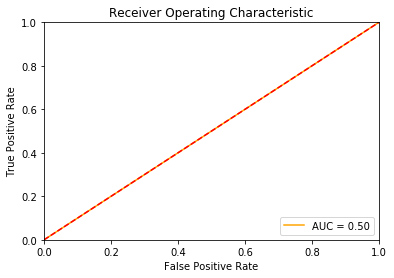

In [84]:
probs_positive = np.concatenate((np.ones((probabilities.shape[0], 1)), 
                                 np.zeros((probabilities.shape[0], 1))),
                                 axis = 1)
scores_positive = score_model(probs_positive, 0.5)
print_metrics(y_test, scores_positive)  
plot_auc(y_test, probs_positive)

In [103]:
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [104]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:500,:])

[[9.99230218e-01 7.69782217e-04]
 [9.97570093e-01 2.42990680e-03]
 [9.99255111e-01 7.44888561e-04]
 [9.98773775e-01 1.22622454e-03]
 [9.99198334e-01 8.01666317e-04]
 [9.98413070e-01 1.58692971e-03]
 [9.98823156e-01 1.17684438e-03]
 [1.72450551e-03 9.98275494e-01]
 [9.99242700e-01 7.57300461e-04]
 [9.97836800e-01 2.16320038e-03]
 [6.45981820e-04 9.99354018e-01]
 [4.80782436e-04 9.99519218e-01]
 [4.19103027e-04 9.99580897e-01]
 [1.76906094e-03 9.98230939e-01]
 [9.99193665e-01 8.06335393e-04]
 [4.62218935e-04 9.99537781e-01]
 [7.30522321e-04 9.99269478e-01]
 [9.74075204e-04 9.99025925e-01]
 [2.08039389e-03 9.97919606e-01]
 [3.01268796e-03 9.96987312e-01]
 [5.27273667e-04 9.99472726e-01]
 [7.87930022e-04 9.99212070e-01]
 [7.85369689e-04 9.99214630e-01]
 [9.11566269e-04 9.99088434e-01]
 [4.90697807e-04 9.99509302e-01]
 [5.03221829e-04 9.99496778e-01]
 [3.99425448e-04 9.99600575e-01]
 [9.98607386e-01 1.39261434e-03]
 [9.99495768e-01 5.04232053e-04]
 [9.99008863e-01 9.91137056e-04]
 [9.989634

                 Confusion matrix
                 Score positive    Score negative
Actual positive       321                 0
Actual negative         0               179

Accuracy  1.00
 
           Positive      Negative
Num case      321           179
Precision    1.00          1.00
Recall       1.00          1.00
F1           1.00          1.00


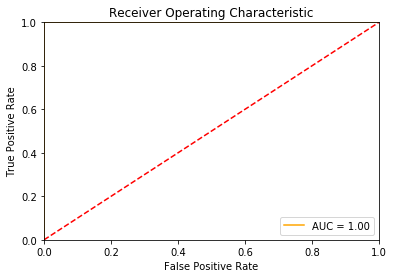

In [105]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities) 

In [106]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.45, 0.40, 0.35, 0.3, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.45
                 Confusion matrix
                 Score positive    Score negative
Actual positive       321                 0
Actual negative         0               179

Accuracy  1.00
 
           Positive      Negative
Num case      321           179
Precision    1.00          1.00
Recall       1.00          1.00
F1           1.00          1.00

For threshold = 0.4
                 Confusion matrix
                 Score positive    Score negative
Actual positive       321                 0
Actual negative         0               179

Accuracy  1.00
 
           Positive      Negative
Num case      321           179
Precision    1.00          1.00
Recall       1.00          1.00
F1           1.00          1.00

For threshold = 0.35
                 Confusion matrix
                 Score positive    Score negative
Actual positive       321                 0
Actual negative         0               179

Accuracy  1.00
 
           Positive      Negative
Num cas

In [107]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:500]))
print(y_test[:500])

[0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1
 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0
 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 

In [108]:
df = pd.DataFrame(scores)
df.head()

,0
0,0
1,0
2,0
3,0
4,0


In [41]:
#df.to_csv('prediction.csv')